### DFT by matrix method:

##### W is the DFT matrix, defined as follows and its elements are given by:

<div style="font-size:20px;"> 
$$  
W_{k,n} = e^{-\frac{2\pi k n}{N}}
$$  
</div>

##### for  k = 0, 1, ..., N-1 e n = 0, 1, ..., N-1

#### The W Matrix is ​​defined as:

<div style="font-size:20px;"> 
$$  
W = \frac{1}{\sqrt{N}} \begin{pmatrix}  
e^{-\frac{j 2 \pi (0)(0)}{N}} & e^{-\frac{j 2 \pi (0)(1)}{N}} & \cdots & e^{-\frac{j 2 \pi (0)(N-1)}{N}} \\
e^{-\frac{j 2 \pi (1)(0)}{N}} & e^{-\frac{j 2 \pi (1)(1)}{N}} & \cdots & e^{-\frac{j 2 \pi (1)(N-1)}{N}} \\
\vdots & \vdots & \ddots & \vdots \\
e^{-\frac{j 2 \pi (N-1)(0)}{N}} & e^{-\frac{j 2 \pi (N-1)(1)}{N}} & \cdots & e^{-\frac{j 2 \pi (N-1)(N-1)}{N}}  
\end{pmatrix} 
$$  
</div>

##### which can be simplified by the factor:

<div style="font-size:20px;"> 
$$  
w = e^{-\frac{j 2\pi}{N}}
$$  
</div>

#### then:

<div style="font-size:20px;"> 
$$  
W = \frac{1}{\sqrt{N}} \begin{bmatrix}  
1 & 1 & 1 & \cdots & 1 \\
1 & w & w^2 & w^3 & \cdots & w^{N-1} \\
1 & w^2 & w^4 & w^6 & \cdots & w^{2(N-1)} \\
1 & w^3 & w^6 & w^9 & \cdots & w^{3(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & w^{N-1} & w^{2(N-1)} & w^{3(N-1)} & \cdots & w^{(N-1)(N-1)}  
\end{bmatrix}  
$$   
</div>

##### As the number N of samples defines the number of divisions of the circuit with unit radius, multiple powers of N have the same value, we then have that:

<div style="font-size:19px;"> 
$$  
w^{N + n} = w^n
$$  
</div>

##### This way, the W matrix can be rewritten in an optimized way, called the Vandermonde Matrix.
## Vandermonde Matrix:

<div style="font-size:19px;"> 
$$  
W = \frac{1}{\sqrt{N}} \begin{bmatrix}  
1 & 1 & 1 & \cdots & 1 \\
w^0 & w^1 & w^2 & \cdots & w^{N-1} \\
w^0 & w^2 & w^4 & \cdots & w^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w^0 & w^3 & w^6 & \cdots & w^{3(N-1)}  
\end{bmatrix}  
$$  
</div>

##### when:
<div style="font-size:22px;">  
$$  
w = e^{\frac{-j 2\pi}{N}}  
$$  
</div>

##### to simplify the calculation of great powers, using the property of the metric trigono circuit, we can do:

<div style="font-size:22px;">  
$$  
    W^{(N + n)} = W^n
$$  
</div>

### As an example, for N= 8, we would have:


<div style="font-size:19px;">  
\[  
W = \begin{bmatrix}  
W^0 & W^1 & W^2 & W^3 & W^4 & W^5 & W^6 & W^7 \\
W^8 & W^9 & W^{10} & W^{11} & W^{12} & W^{13} & W^{14} & W^{15} \\
W^{16} & W^{17} & W^{18} & W^{19} & W^{20} & W^{21} & W^{22} & W^{23} \\
W^{24} & W^{25} & W^{26} & W^{27} & W^{28} & W^{29} & W^{30} & W^{31} \\
W^{32} & W^{33} & W^{34} & W^{35} & W^{36} & W^{37} & W^{38} & W^{39} \\
W^{40} & W^{41} & W^{42} & W^{43} & W^{44} & W^{45} & W^{46} & W^{47} \\
W^{48} & W^{49} & W^{50} & W^{51} & W^{52} & W^{53} & W^{54} & W^{55} \\
W^{56} & W^{57} & W^{58} & W^{59} & W^{60} & W^{61} & W^{62} & W^{63} \\
\end{bmatrix}  
\]
</div>

### but using the property seen above, we have:


<div style="font-size:14px;">  
\[  
W = \frac{1}{\sqrt{8}} \begin{bmatrix}  
w^0 & w^0 & w^0 & w^0 & w^0 & w^0 & w^0 & w^0 \\
w^0 & w^1 & w^2 & w^3 & w^4 & w^5 & w^6 & w^7 \\
w^0 & w^2 & w^4 & w^6 & w^0 & w^2 & w^4 & w^6 \\
w^0 & w^3 & w^6 & w^1 & w^4 & w^7 & w^2 & w^5 \\
w^0 & w^4 & w^0 & w^4 & w^0 & w^4 & w^0 & w^4 \\
w^0 & w^5 & w^2 & w^7 & w^4 & w^1 & w^6 & w^3 \\
w^0 & w^6 & w^4 & w^2 & w^0 & w^6 & w^4 & w^2 \\
w^0 & w^7 & w^6 & w^5 & w^4 & w^3 & w^2 & w^1 \\
\end{bmatrix}   
= \frac{1}{\sqrt{8}} \begin{bmatrix}  
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & w & -j & -jw & -1 & -w & j & jw \\
1 & -j & -1 & j & 1 & -j & -1  & j \\
1 & -jw & j & w & -1 & jw & -j & -w \\
1 & -1 & 1 & -1 & 1 & -1 & 1 & -1\\
1 & -w & -j & jw & -1 & w & j & -jw\\
1 & j & -1 & -j & 1 & j & -1 & -j \\
1 & jw & j & -w & -1 & -jw & -j & w   
\end{bmatrix}  
\]
</div>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter
from scipy import signal
import cmath

plt.style.use('seaborn-v0_8-poster')
%matplotlib inline

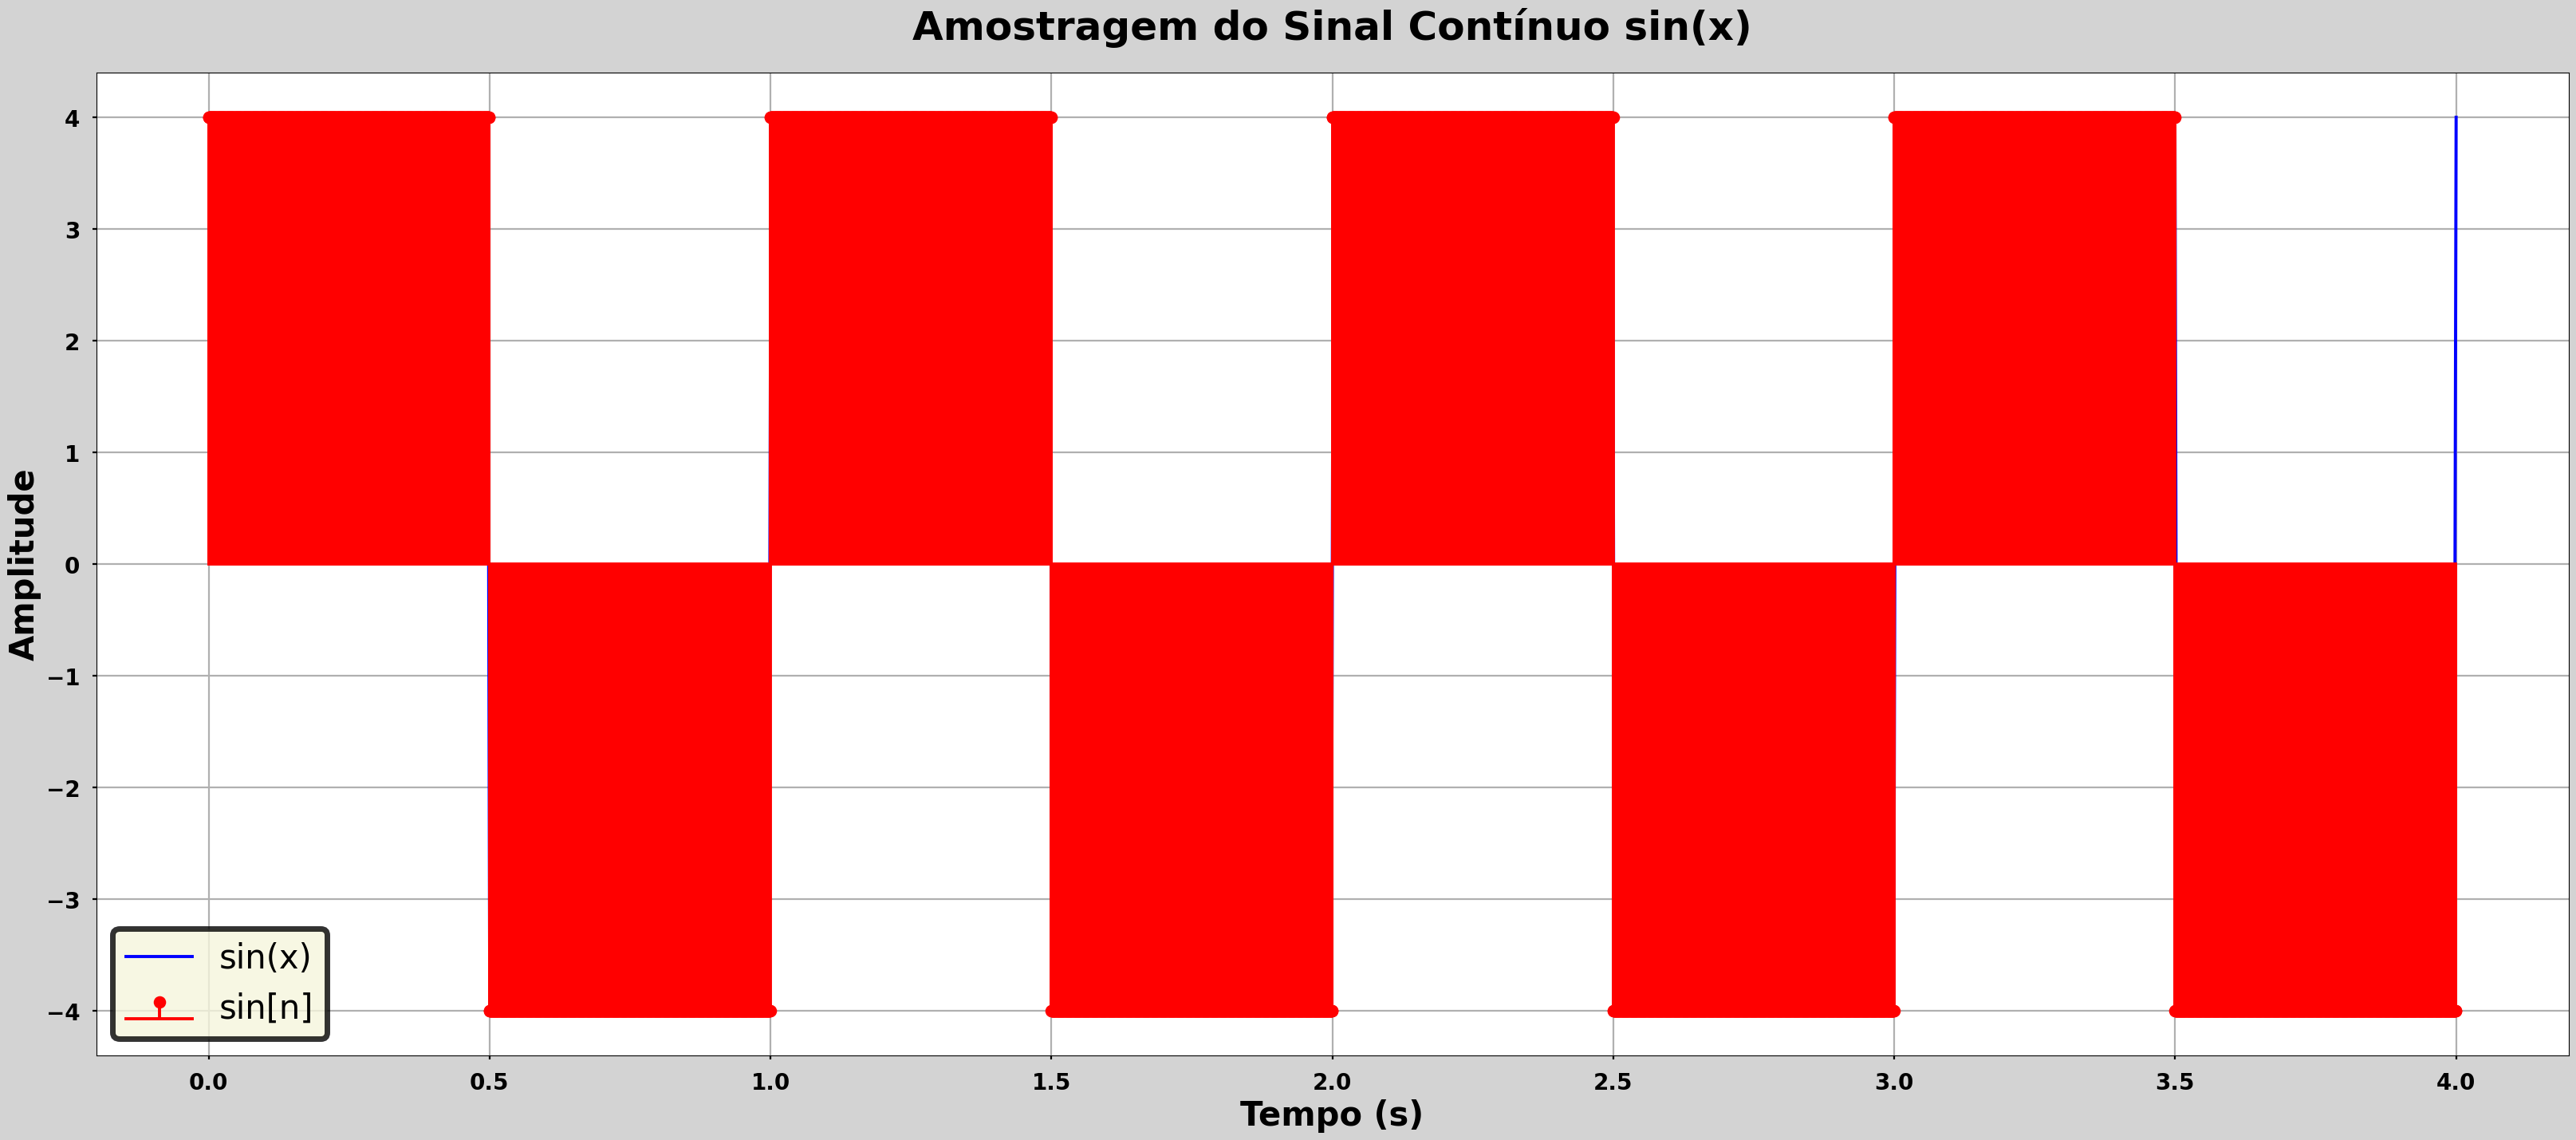

In [14]:
freq = 1
t = 4
n_samples = 2048

t_continuous = np.linspace(0, t, 1000)
t_sampled = np.arange(0, t, 1/n_samples)

continuous_signal = 4*signal.square(2 * np.pi * freq * t_continuous)
sampled_signal = 4*signal.square(2 * np.pi * freq * t_sampled)
 
ax = plt.figure(figsize=(40, 16))  
ax.set_facecolor('lightgrey')
plt.plot(t_continuous, continuous_signal, label='sin(x)', color='b')
plt.stem(t_sampled, sampled_signal, linefmt='r-', markerfmt='ro', basefmt='r-', label='sin[n]')
plt.title('Amostragem do Sinal Contínuo sin(x)', fontsize=36, fontweight='bold', pad=30)  
plt.xlabel('Tempo (s)', fontsize=30, fontweight='bold')  
plt.ylabel('Amplitude', fontsize=30, fontweight='bold') 
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
legend = plt.legend(fontsize=30, edgecolor='black', facecolor='beige', frameon=True)
legend.get_frame().set_linewidth(5)
plt.grid()  
plt.show()

#### Calculating the DFT in the non-optimized case:

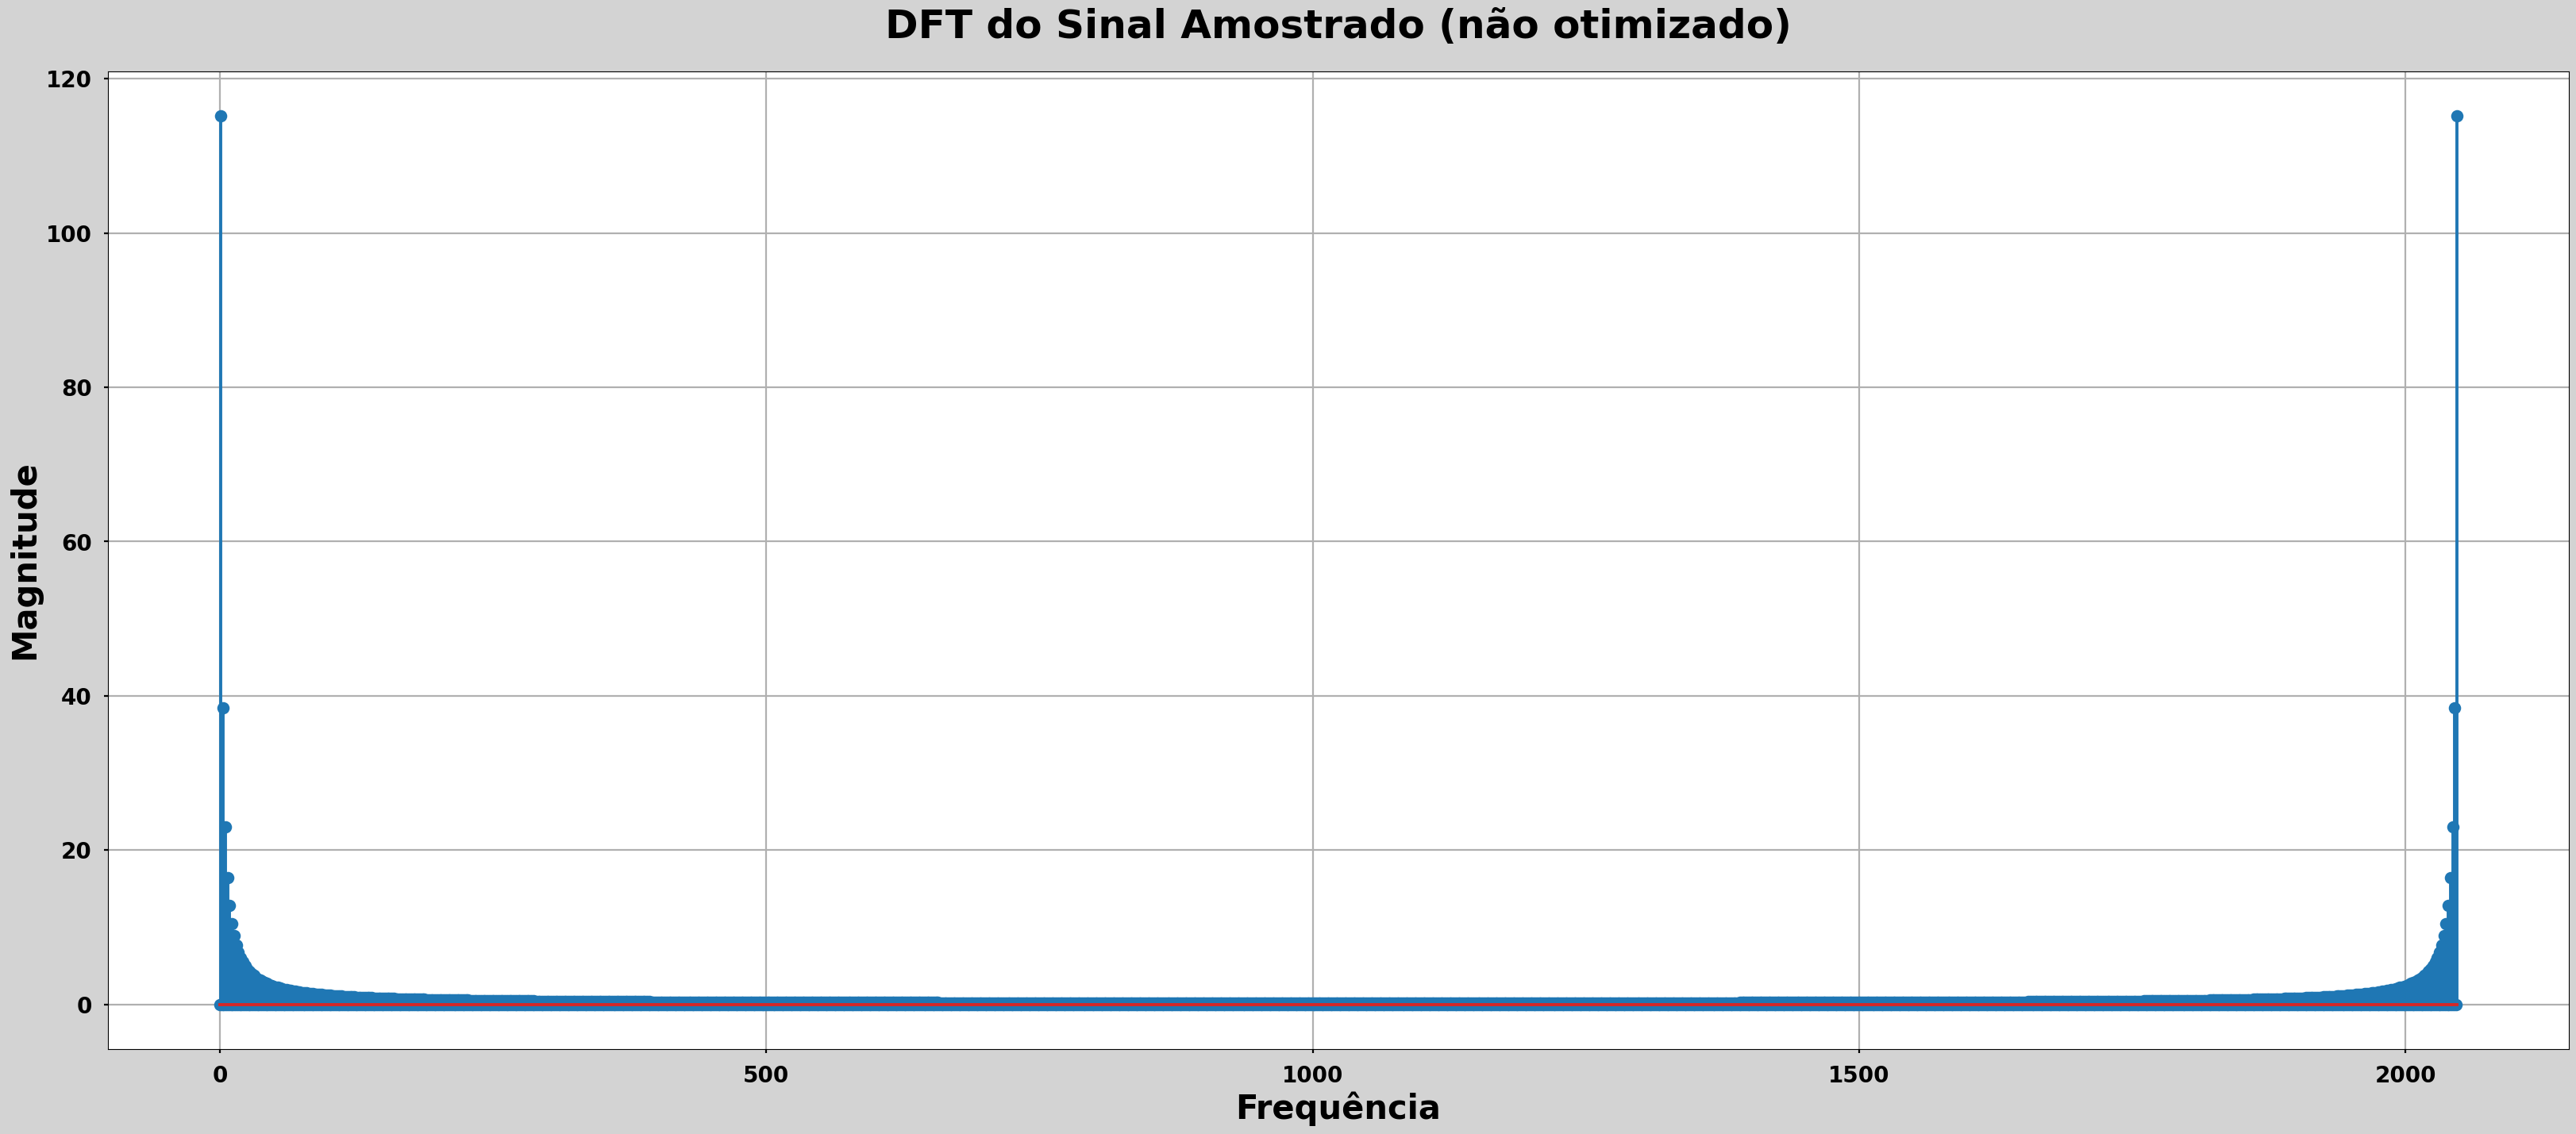

Tempo de execução do caso não otimizado: 14.1s


In [3]:
dft_signal = np.zeros(n_samples, dtype=complex)  

tic = perf_counter()
for k in range(n_samples):  
    for n in range(n_samples):  
        dft_signal[k] += sampled_signal[n] * (1/np.sqrt(n_samples)) *np.exp(-1j * 2 * np.pi * k * n / n_samples)   
toc = perf_counter() 

freq_axis = np.arange(n_samples)  
ax = plt.figure(figsize=(40, 16))  
ax.set_facecolor('lightgrey') 
plt.stem(freq_axis, np.abs(dft_signal))  
plt.title('DFT do Sinal Amostrado (não otimizado)', fontsize=36, fontweight='bold', pad=30)  
plt.xlabel('Frequência', fontsize=30, fontweight='bold')  
plt.ylabel('Magnitude', fontsize=30, fontweight='bold')  
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.grid()  
plt.show()

print(f'Tempo de execução do caso não otimizado: {(toc - tic):.3}s')

## Calculando a DFT na forma otimizada utilizando a Matriz de Vandermonde:

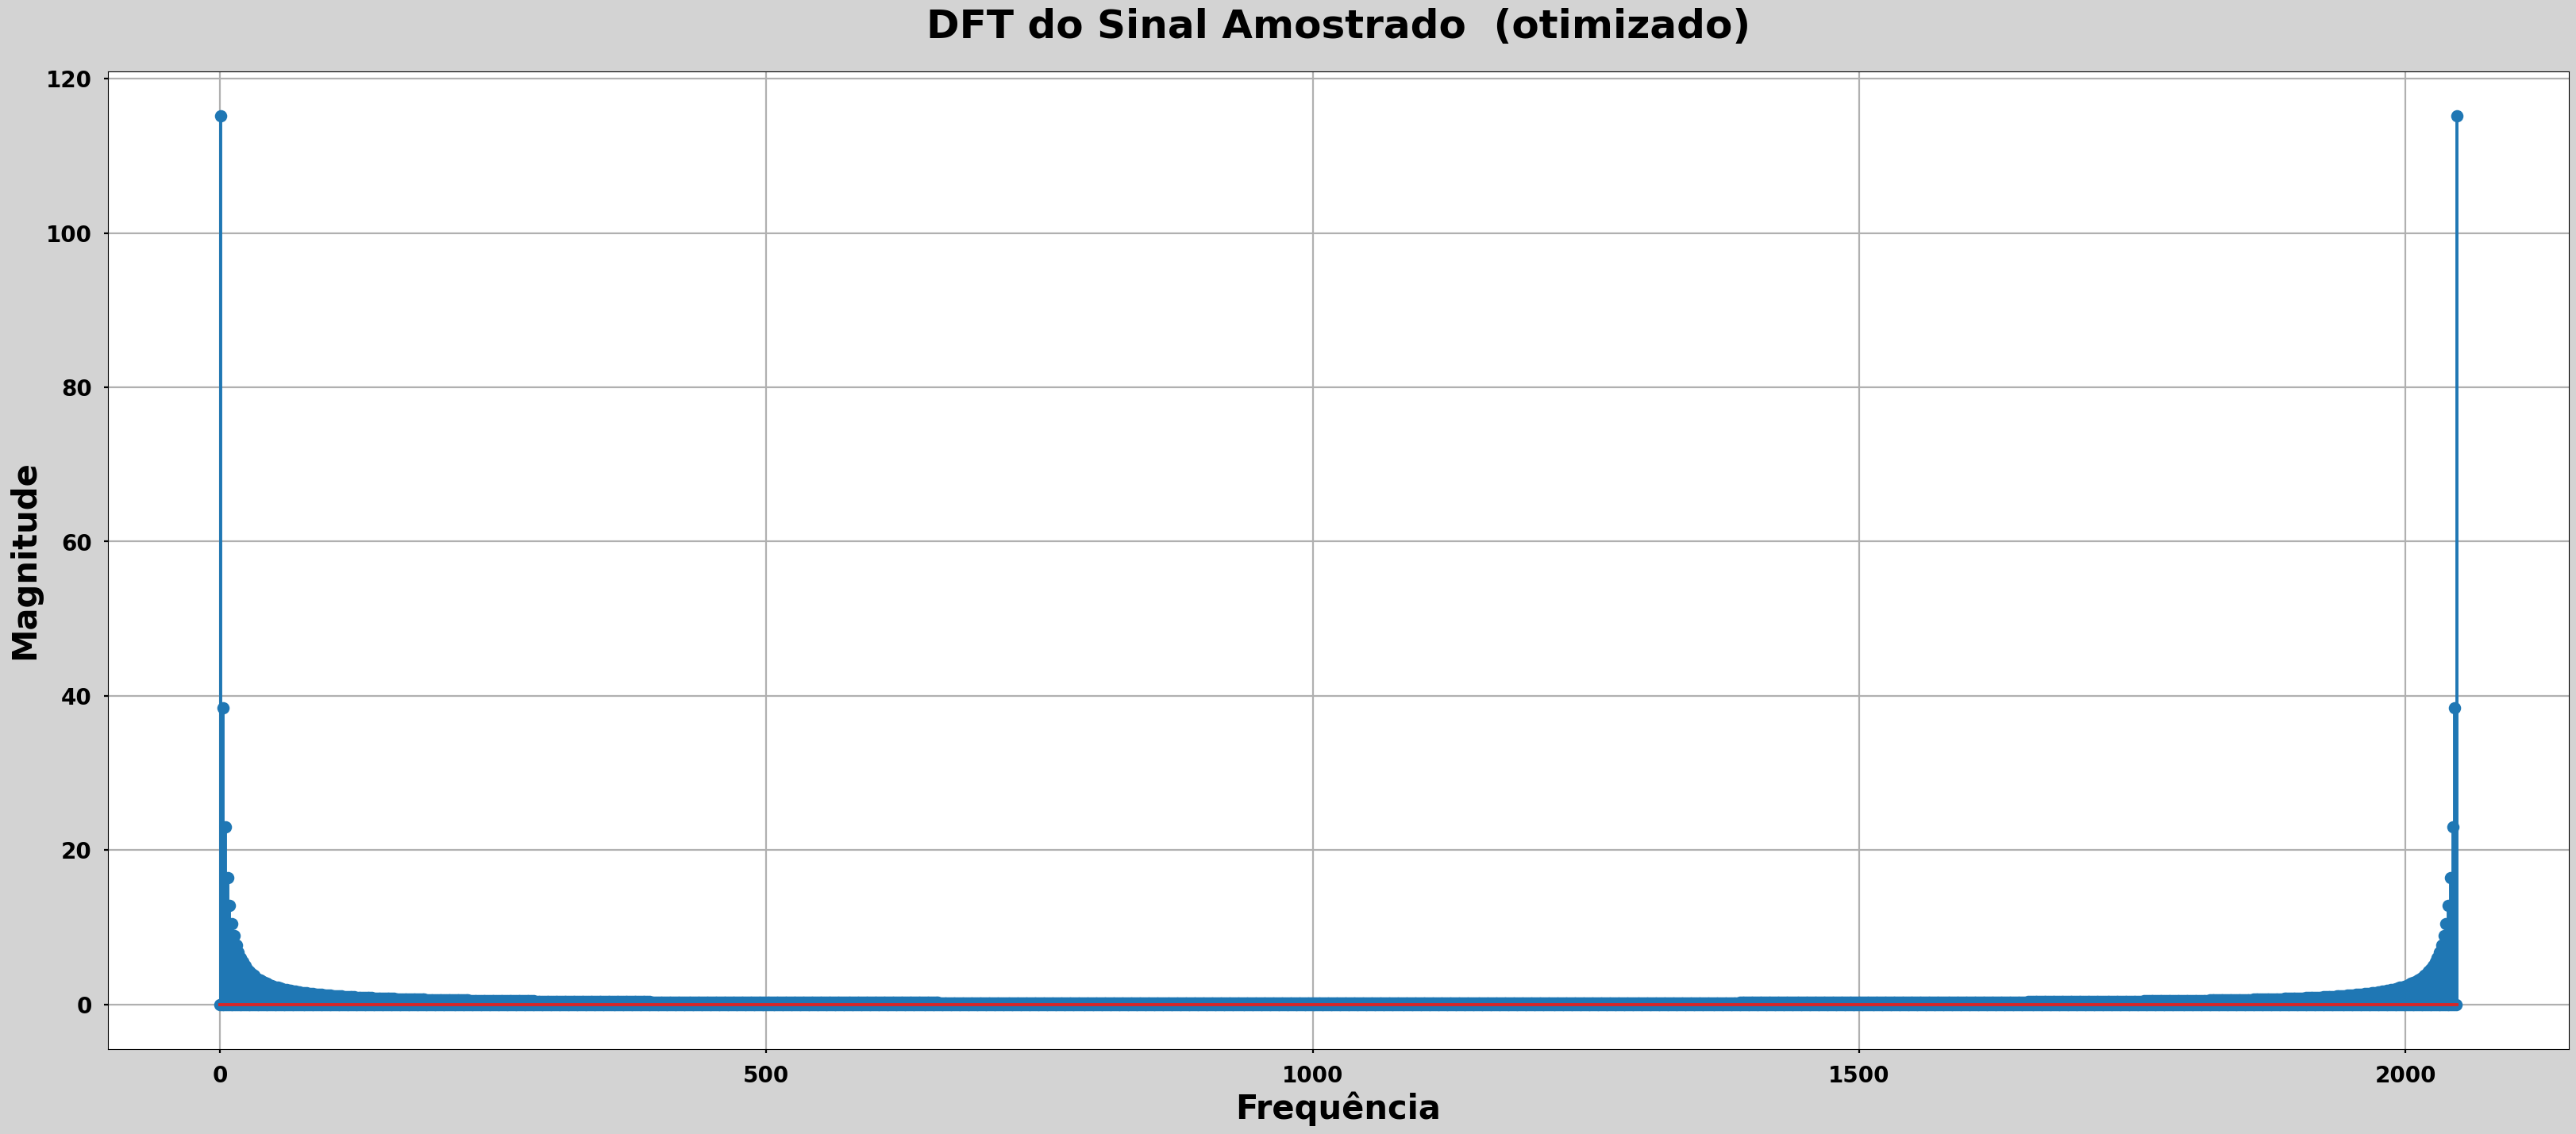

Tempo de execução do caso otimizado: 14.4s


In [4]:
dft_signal = np.zeros(n_samples, dtype=complex)  

tic = perf_counter()
for k in range(n_samples):  
    for n in range(n_samples):
        dft_signal[k] += sampled_signal[n] * (1/np.sqrt(n_samples)) * np.exp(-1j * 2 * np.pi * ((k * n) % n_samples) / n_samples)
toc = perf_counter()         

freq_axis = np.arange(n_samples)  
ax = plt.figure(figsize=(40, 16))  
ax.set_facecolor('lightgrey') 
plt.stem(freq_axis, np.abs(dft_signal))  
plt.title('DFT do Sinal Amostrado  (otimizado)', fontsize=36, fontweight='bold', pad=30)  
plt.xlabel('Frequência', fontsize=30, fontweight='bold')  
plt.ylabel('Magnitude', fontsize=30, fontweight='bold')  
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

plt.grid()  
plt.show()

print(f'Tempo de execução do caso otimizado: {(toc - tic):.3}s')

## Aplicando a função nativa da FFT:

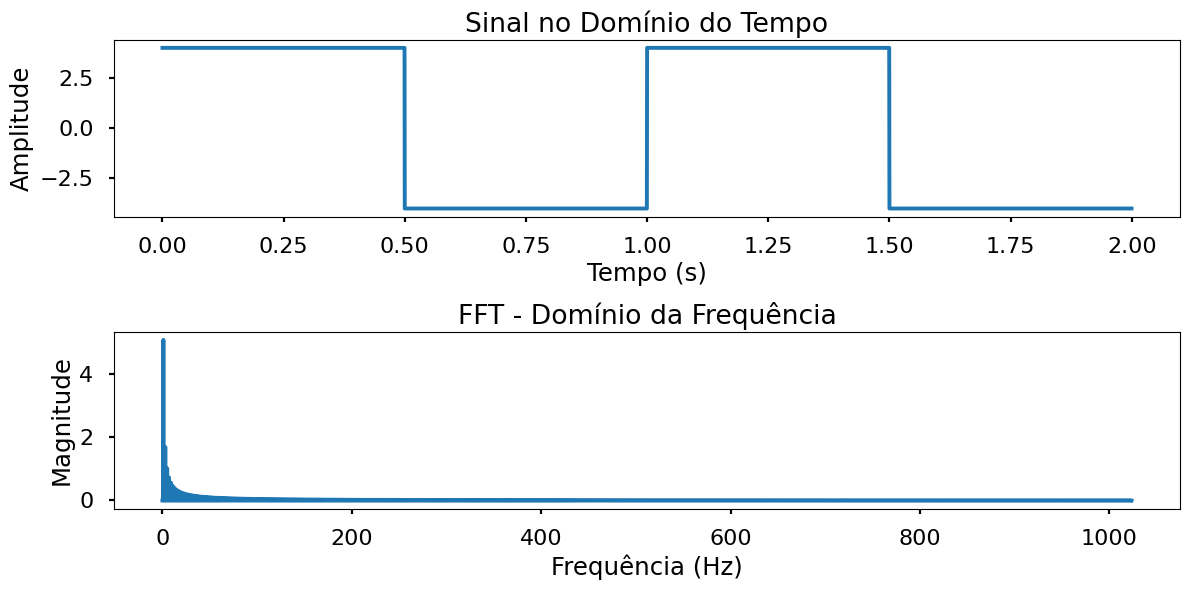

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Sinal de exemplo: uma combinação de duas senóides
fs = n_samples # Taxa de amostragem (Hz)
t = t_sampled  # Vetor de tempo de 0 a 1 segundo
fft_signal = 4*signal.square(2 * np.pi * freq * t)

# Calcular a FFT
fft_result = np.fft.fft(fft_signal)
fft_freq = np.fft.fftfreq(len(fft_signal), 1/fs)

# Plotar o sinal original
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, fft_signal)
plt.title('Sinal no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar a magnitude da FFT
plt.subplot(2, 1, 2)
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_result[:len(fft_result)//2]) * (2 / len(fft_signal)))
plt.title('FFT - Domínio da Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


## Algoritmo da FFT:

In [11]:
print(t_sampled);




[0.00000000e+00 4.88281250e-04 9.76562500e-04 ... 1.99853516e+00
 1.99902344e+00 1.99951172e+00]
